# 1. Read Dataset

In [ ]:
import pandas as pd
import numpy as np

# Load data (file CSV)
file_path = '/content/sample_data/AGUSTUS.csv'  # Ganti dengan path file Anda
# file_path = '/content/sample_data/Agustus_Balance.csv'  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Berat,Tinggi,LiLA,Umur,JK_L,JK_P,Status
0,31.5,116.7,19.0,59.8,1,0,4
1,24.9,106.5,17.0,59.2,0,1,4
2,30.4,112.3,21.0,58.7,1,0,4
3,23.7,102.8,16.0,58.3,0,1,4
4,29.8,114.6,15.0,57.2,1,0,4


In [ ]:
data.describe()

,No,BB Lahir,TB Lahir,Berat,Tinggi,LiLA,ZS BB/U,ZS TB/U,ZS BB/TB,Jml Vit A
count,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3539.000000,3552.000000,3552.000000,3552.000000,3334.0
mean,1776.500000,3.085985,48.898789,13.131534,89.556898,13.594518,-0.278133,-0.765512,0.198894,1.0
std,1025.518405,1.515460,4.477051,3.535343,12.368406,3.294849,1.042200,0.867618,1.139499,0.0
min,1.000000,0.000000,0.000000,2.200000,46.000000,0.000000,-3.330000,-4.000000,-2.630000,1.0
25%,888.750000,3.000000,49.000000,10.400000,80.175000,14.000000,-1.030000,-1.430000,-0.620000,1.0
50%,1776.500000,3.000000,49.000000,13.000000,91.700000,14.000000,-0.260000,-0.870000,0.180000,1.0
75%,2664.250000,3.000000,50.000000,15.600000,99.700000,15.000000,0.440000,-0.230000,0.940000,1.0
max,3552.000000,35.000000,58.000000,32.400000,119.900000,22.000000,4.780000,4.750000,5.820000,1.0


In [ ]:
print(data.dtypes)
data = pd.DataFrame(data)
print(data.shape)

No                      int64
NIK                    object
Nama                   object
JK                     object
Tgl Lahir              object
BB Lahir              float64
TB Lahir              float64
Nama Ortu              object
Prov                   object
Kab/Kota               object
Kec                    object
Pukesmas               object
Desa/Kel               object
Posyandu               object
RT                     object
RW                     object
Alamat                 object
Usia Saat Ukur         object
Tanggal Pengukuran     object
Berat                 float64
Tinggi                float64
Cara Ukur              object
LiLA                  float64
BB/U                   object
ZS BB/U               float64
TB/U                   object
ZS TB/U               float64
BB/TB                  object
ZS BB/TB              float64
Naik Berat Badan       object
PMT Diterima (kg)      object
Jml Vit A             float64
KPSP                   object
KIA       

# 2. Pemilihan Atribut

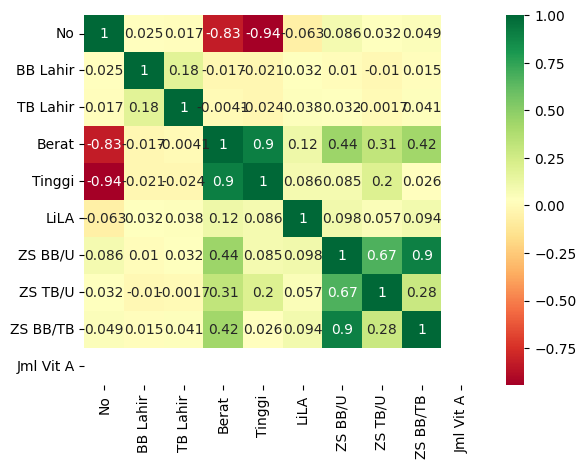

In [ ]:
import seaborn as sns
import pandas as pd

def titanic_corr(data):
    numeric_data = data.select_dtypes(include=['number'])
    correlation = numeric_data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap='RdYlGn')

titanic_corr(data)

In [ ]:
# Pilih kolom yang relevan
columns_to_keep = ['JK', 'Usia Saat Ukur', 'Berat', 'Tinggi', 'LiLA', 'BB/TB']
data = data[columns_to_keep]

# 3. Missing Value & Isi dengan Mean (LiLA)

In [ ]:
print(data.isnull().sum())
print(data.shape)

JK                 0
Usia Saat Ukur     0
Berat              0
Tinggi             0
LiLA              13
BB/TB              0
dtype: int64
(3552, 6)


In [ ]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

# 4. Normalisasi Umur dengan modul (regular expression (regex))



In [ ]:
import re

# 1. Konversi kolom 'Usia Saat Ukur' menjadi format bulan
def convert_to_months(age_str):
    """
    Mengubah umur dalam format 'X tahun - Y bulan - Z hari' ke format bulan.
    """
    # Inisialisasi nilai default
    years, months, days = 0, 0, 0

    # Menggunakan regex untuk menangkap angka pada string umur
    year_match = re.search(r'(\d+)\s*[Tt]ahun', str(age_str))  # Menangkap tahun
    month_match = re.search(r'(\d+)\s*[Bb]ulan', str(age_str))  # Menangkap bulan
    day_match = re.search(r'(\d+)\s*[Hh]ari', str(age_str))  # Menangkap hari

    # Menangkap hasil dari regex (jika ada)
    if year_match:
        years = int(year_match.group(1))
    if month_match:
        months = int(month_match.group(1))
    if day_match:
        days = int(day_match.group(1))

    # Konversi umur menjadi bulan (dengan asumsi 1 bulan = 30 hari)
    total_months = (years * 12) + months + (days / 30)

    # Kembalikan hasil yang dibulatkan ke 2 desimal
    return round(total_months, 2)

data['Umur'] = data['Usia Saat Ukur'].apply(convert_to_months)
data = data.drop('Usia Saat Ukur', axis=1)  # Drop kolom 'Usia Saat Ukur' asli

# 5. One-hot encoding untuk kolom 'JK' (Jenis Kelamin)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_jk = enc.fit_transform(data[['JK']])
encoded_df = pd.DataFrame(encoded_jk, columns=enc.get_feature_names_out(['JK']))
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('JK', axis=1)

# 6. Mapping kolom BB/TB

In [ ]:
data['BB/TB'].value_counts()

,count
BB/TB,
Normal,2716
Beresiko Gizi Lebih,591
Gizi Lebih,155
Obesitas,51
Gizi Kurang,39


In [ ]:
def map_bbtb(status):
    mapping = {'Gizi Kurang': 0, 'Normal': 1, 'Beresiko Gizi Lebih': 2, 'Gizi Lebih': 3, 'Obesitas': 4}
    return mapping.get(status, np.nan)

data['Status'] = data['BB/TB'].apply(map_bbtb)

# Drop kolom asli BB/TB setelah mapping
data = data.drop('BB/TB', axis=1)

# 7. Tampilkan Hasil Praprocessing

In [ ]:
print("\nData setelah preprocessing:")
print(data.head(10))


Data setelah preprocessing:
   Berat  Tinggi  LiLA  Umur  JK_L  JK_P  Status
0   31.5   116.7  19.0  59.8     1     0       4
1   24.9   106.5  17.0  59.2     0     1       4
2   30.4   112.3  21.0  58.7     1     0       4
3   23.7   102.8  16.0  58.3     0     1       4
4   29.8   114.6  15.0  57.2     1     0       4
5   22.1    99.7  19.0  56.4     0     1       4
6   25.3   109.3  20.0  55.8     1     0       4
7   28.6   114.2  14.0  55.3     1     0       4
8   24.4   107.1  18.0  54.8     0     1       4
9   26.2   105.8  15.0  54.1     1     0       4


In [ ]:
# Simpan hasil
data.to_csv('processed_AGUSTUS.csv', index=False)
print("\nData telah disimpan ke 'processed_AGUSTUS.csv'")


Data telah disimpan ke 'processed_AGUSTUS.csv'


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Pisahkan fitur (X) dan target (y)
X = data.drop('Status', axis=1)  # Hapus kolom 'Status' dari fitur
y = data['Status']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear', probability=True)  # Pastikan probability=True untuk prediksi probabilitas
svm_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = svm_model.predict(X_test)

# Evaluasi akurasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.89      0.95      0.92        41
           2       0.96      0.84      0.90        58
           3       0.84      1.00      0.91        46
           4       1.00      0.89      0.94        38

    accuracy                           0.93       220
   macro avg       0.94      0.93      0.93       220
weighted avg       0.93      0.93      0.93       220


Confusion Matrix:
[[36  1  0  0  0]
 [ 0 39  2  0  0]
 [ 0  4 49  5  0]
 [ 0  0  0 46  0]
 [ 0  0  0  4 34]]


Pembagian Data Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Inisialisasi SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Cross-validation untuk Akurasi
scores_accuracy = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy per Fold:", scores_accuracy)
print("Rata - Rata Nilai Akurasi (SVM): %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

# Cross-validation untuk Precision Macro
scores_precision = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='precision_macro')
print("Precision Macro per Fold:", scores_precision)
print("Rata - Rata Nilai Precision Macro (SVM): %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

# Cross-validation untuk Recall Macro
scores_recall = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='recall_macro')
print("Recall Macro per Fold:", scores_recall)
print("Rata - Rata Nilai Recall Macro (SVM): %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

# Cross-validation untuk F1 Macro
scores_f1 = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Macro per Fold:", scores_f1)
print("Rata - Rata Nilai F1 Macro (SVM): %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Accuracy per Fold: [0.91967871 0.92957746 0.92152918 0.90744467 0.94366197]
Rata - Rata Nilai Akurasi (SVM): 0.92 (+/- 0.01)
Precision Macro per Fold: [0.90277574 0.90875311 0.87428637 0.89478657 0.94466887]
Rata - Rata Nilai Precision Macro (SVM): 0.91 (+/- 0.02)
Recall Macro per Fold: [0.81566674 0.8895668  0.72805225 0.78086765 0.89722825]
Rata - Rata Nilai Recall Macro (SVM): 0.82 (+/- 0.06)
F1 Macro per Fold: [0.84878532 0.89707344 0.7850972  0.82613531 0.91855028]
Rata - Rata Nilai F1 Macro (SVM): 0.86 (+/- 0.05)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Pisahkan fitur (X) dan target (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.95      0.88      0.91        41
           2       0.85      0.86      0.85        58
           3       0.74      0.74      0.74        46
           4       0.87      0.87      0.87        38

    accuracy                           0.86       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.86      0.86      0.86       220


Confusion Matrix:
[[37  0  0  0  0]
 [ 2 36  2  1  0]
 [ 0  2 50  6  0]
 [ 0  0  7 34  5]
 [ 0  0  0  5 33]]


Pembagian Data Cross-Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Pastikan data X_train dan y_train sudah diinisialisasi
# Decision Tree Classifier
DT = DecisionTreeClassifier()

# Menghitung Accuracy
scores_accuracy = cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy per Fold:", scores_accuracy)
print("Rata - Rata Nilai Akurasi (DT): %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

# Menghitung Precision Macro
scores_precision = cross_val_score(DT, X_train, y_train, cv=5, scoring='precision_macro')
print("Precision Macro per Fold:", scores_precision)
print("Rata - Rata Nilai Precision Macro (DT): %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

# Menghitung Recall Macro
scores_recall = cross_val_score(DT, X_train, y_train, cv=5, scoring='recall_macro')
print("Recall Macro per Fold:", scores_recall)
print("Rata - Rata Nilai Recall Macro (DT): %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

# Menghitung F1 Macro
scores_f1 = cross_val_score(DT, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Macro per Fold:", scores_f1)
print("Rata - Rata Nilai F1 Macro (DT): %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

Accuracy per Fold: [0.90160643 0.9054326  0.91549296 0.8832998  0.91146881]
Rata - Rata Nilai Akurasi (DT): 0.90 (+/- 0.01)
Precision Macro per Fold: [0.6771625  0.69728133 0.82169454 0.64019481 0.82391769]
Rata - Rata Nilai Precision Macro (DT): 0.73 (+/- 0.08)
Recall Macro per Fold: [0.60861848 0.73186177 0.68328208 0.61641979 0.80653184]
Rata - Rata Nilai Recall Macro (DT): 0.69 (+/- 0.07)
F1 Macro per Fold: [0.60966748 0.65476157 0.73365429 0.62019517 0.82405565]
Rata - Rata Nilai F1 Macro (DT): 0.69 (+/- 0.08)


# ROC AUC

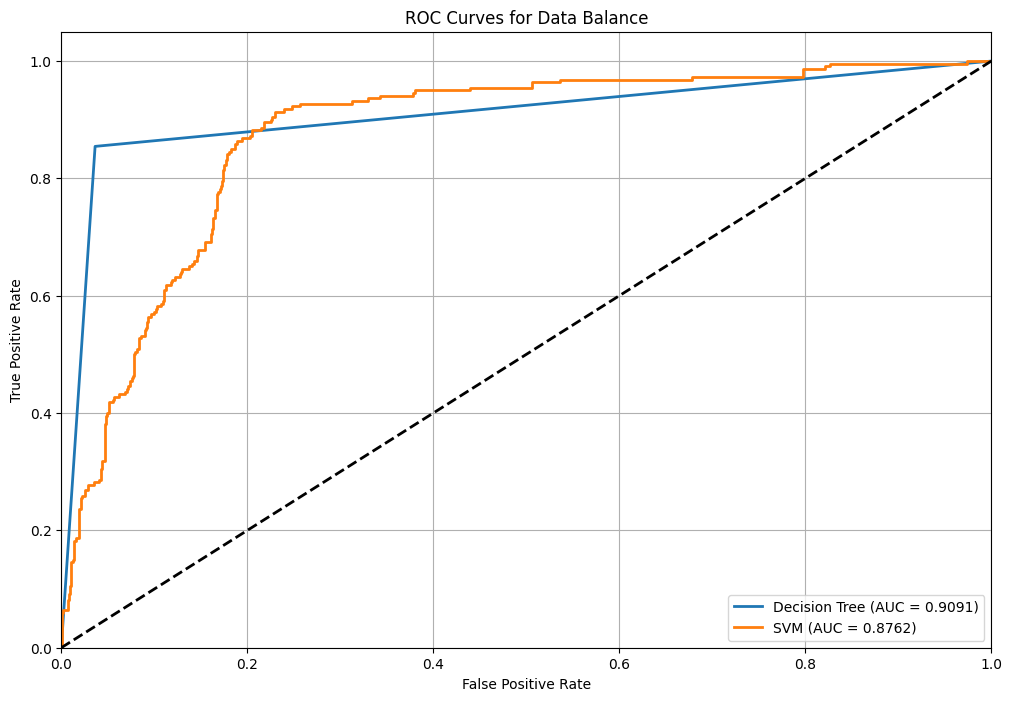

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize your models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
}

# Fit the models and get predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit on the original labels
    # Store the probability predictions for the test set
    predictions[model_name] = model.predict_proba(X_test)

# Binarize the output for ROC AUC calculation
unique_classes = np.unique(y)  # Get unique classes from original y
ytest_bin = label_binarize(y_test, classes=unique_classes)  # Use unique classes
n_classes = ytest_bin.shape[1]  # Number of classes after binarization

# Set up the plot for all models
plt.figure(figsize=(12, 8))

# Calculate and plot ROC curve for each model
for model_name, preds in predictions.items():
    # Calculate ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(ytest_bin.ravel(), preds.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plotting diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Adding titles and labels
plt.title('ROC Curves for Data Balance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()

# Show the combined plot
plt.show()

# Deploy Stramlit

Menyimpan Model dalam Bentuk Pickle

In [ ]:
# Mem-pickle-kan model

import pickle

# Nama pickle - classifier.pkl
pickle_out = open("classifier.pkl", "wb")

# Nama model - classifier
pickle.dump(svm_model,  pickle_out)
pickle_out.close()

Mendeploy Model dengan Mempergunakan Streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

# Function to preprocess input data
def preprocess_input(jk, umur, berat, tinggi, lila):
    """
    Preprocess user input to match the dataset structure with one-hot encoded gender (JK_L and JK_P).
    """
    data = pd.DataFrame({
        'Berat': [berat],
        'Tinggi': [tinggi],
        'LiLA': [lila],
        'Umur': [umur],  # Age in months
        'JK_L': [1 if jk == "L" else 0],  # JK_L is 1 if gender is Laki-Laki
        'JK_P': [1 if jk == "P" else 0],  # JK_P is 1 if gender is Perempuan
    })
    return data

# Streamlit app
st.set_page_config(
    page_title="Prediksi Status Gizi Balita",
    page_icon="👶",
    layout="centered",
    initial_sidebar_state="expanded",
)

# Custom CSS for UI Styling
st.markdown("""
    <style>
    body {
        background-color: #f9f9f9;
        font-family: "Arial", sans-serif;
    }
    .title {
        font-size: 36px;
        font-weight: bold;
        color: #4caf50;
        text-align: center;
        margin-top: -20px;
        margin-bottom: 20px;
    }
    .sidebar .sidebar-content {
        background: #fffbe6;
    }
    .main-button {
        background-color: #4caf50;
        color: white;
        font-size: 16px;
        padding: 10px 15px;
        border-radius: 8px;
        border: none;
    }
    .main-button:hover {
        background-color: #45a049;
    }
    </style>
""", unsafe_allow_html=True)

# Page Title
st.markdown('<div class="title">Prediksi Status Gizi Balita</div>', unsafe_allow_html=True)

# App Subtitle
st.subheader("Streamlit Gizi Balita Classifier ML SVM")

# Input fields with better formatting
st.markdown("### Masukkan Data Balita:")
berat = st.number_input("Berat Badan (kg):", min_value=0.0, value=0.0, step=0.1)
tinggi = st.number_input("Tinggi Badan (cm):", min_value=0.0, value=0.0, step=0.1)
lila = st.number_input("Lingkar Lengan Atas (cm):", min_value=0.0, value=0.0, step=0.1)
umur = st.number_input("Umur (0-60 bulan):", min_value=0.0, value=0.0, step=0.1)  # Numeric input for age in months
jk = st.selectbox("Jenis Kelamin:", ["L", "P"], help="Pilih jenis kelamin balita (L = Laki-Laki, P = Perempuan)")

# Prediction button with custom style
if st.button("Prediksi", help="Klik tombol ini untuk melihat hasil prediksi status gizi."):
    try:
        # Preprocess input
        input_data = preprocess_input(jk, umur, berat, tinggi, lila)

        # Ensure all required features are present and numeric
        if input_data.isnull().values.any() or (input_data < 0).any(axis=None):
            raise ValueError("Pastikan semua input diisi dengan nilai valid (positif).")

        # Predict the class (status gizi)
        prediction = classifier.predict(input_data)[0]

        # Convert prediction to human-readable label
        label_mapping = {
            0: '🥄 Gizi Kurang',
            1: '🥦 Normal',
            2: '🍔 Beresiko Gizi Lebih',
            3: '🍩 Gizi Lebih',
            4: '🎂 Obesitas'
        }

        # Display result
        st.success(f"Prediksi Status Gizi: {label_mapping[prediction]}")
        st.balloons()

    except ValueError as e:
        st.error(f"Error: {e}. Periksa input Anda.")
    except Exception as e:
        st.error(f"Terjadi kesalahan tak terduga: {e}")

Writing app.py


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.196.106.54


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴

⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.106.54:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://lovely-badgers-mate.loca.lt
